In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Print the dimensions of the dataset (number of features)
print("Number of features:", cancer.data.shape[1])

# Apply LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(cancer.data, cancer.target)

# Print the dimensions of the transformed dataset
print("Dimension after LDA:", X_lda.shape[1])


Number of features: 30
Dimension after LDA: 1


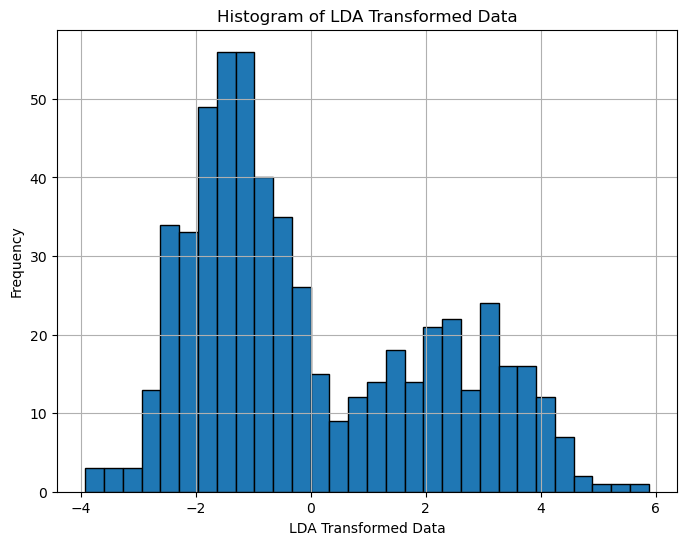

In [42]:
import matplotlib.pyplot as plt

# Plot histogram of the transformed data
plt.figure(figsize=(8, 6))
plt.hist(X_lda, bins=30, edgecolor='k')
plt.xlabel('LDA Transformed Data')
plt.ylabel('Frequency')
plt.title('Histogram of LDA Transformed Data')
plt.grid(True)
plt.show()


In [47]:
df = pd.read_csv('winequality-red.csv')

In [96]:
df.shape

(1599, 12)

In [48]:
df.shape

(1599, 12)

In [49]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
target_name ='quality'
y = df['quality']
X = df.drop(target_name,axis=1)

In [51]:
X.shape

(1599, 11)

In [53]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [54]:
y.unique()  #6 classes #Multiclass classification Problem

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [56]:
# Scaling 

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale =sc.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=0)

In [60]:
X_train.shape,y_train.shape

((1279, 11), (1279,))

In [61]:
X_test.shape,y_test.shape

((320, 11), (320,))

In [62]:
#lda can be used for dimension reduction 

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=5)   #no of components is equal to no of target variable classes -1
x_train_lda = lda.fit_transform(X_train,y_train)
x_test_lda = lda.transform(X_test)

In [64]:
x_train_lda.shape,x_test_lda.shape

((1279, 5), (320, 5))

In [65]:
lda.explained_variance_ratio_

array([0.82863687, 0.12032383, 0.03227525, 0.01666889, 0.00209516])

In [67]:
0.82863687+ 0.12032383+ 0.03227525+ 0.01666889+ 0.00209516

1.0

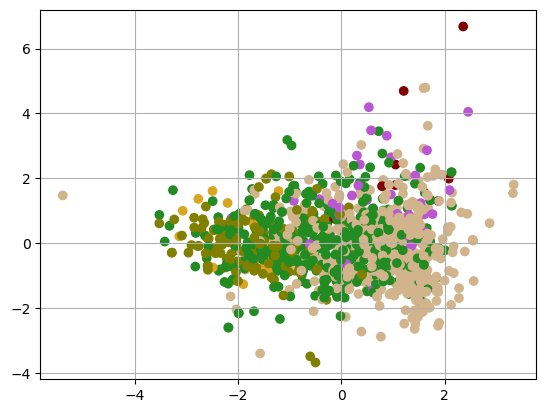

In [71]:
colors = ['royalblue','red','deeppink','maroon','mediumorchid','tan','forestgreen','olive','goldenrod','lightcyan','navyblue']
vectorizer = np.vectorize(lambda x:colors[x%len(colors)])
plt.scatter(x_train_lda[:,0],x_train_lda[:,1],c=vectorizer(y_train))
plt.grid()


In [88]:
#Logistic Regression model on 5 components

In [74]:
from sklearn.linear_model import LogisticRegression
import datetime
start = datetime.datetime.now()
lg = LogisticRegression(random_state=0)
lg.fit(x_train_lda,y_train)
end = datetime.datetime.now()
print("Total execution time with LDA is ",end-start)

Total execution time with LDA is  0:00:00.028037


In [78]:
y_pred_lda = lg.predict(x_test_lda)

In [79]:
y_pred_lda.shape

(320,)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred_lda)
#sns.heatmap(cm,annot=True)
print(cm)

[[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0 104  31   0   0]
 [  0   0  37  89  16   0]
 [  0   0   2  17   8   0]
 [  0   0   0   1   2   0]]


In [85]:
from sklearn import metrics
print("Test Accuracy on 5 components = " , metrics.accuracy_score(y_test, y_pred_lda) *100)

Test Accuracy on 11-features =  62.81250000000001


In [86]:
print("Classification report with LDA on 5 components: \n", classification_report(y_test,y_pred_lda,digits=4))

Classification report with LDA on 5 components: 
               precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         2
           4     0.0000    0.0000    0.0000        11
           5     0.6887    0.7704    0.7273       135
           6     0.6268    0.6268    0.6268       142
           7     0.2963    0.2963    0.2963        27
           8     0.0000    0.0000    0.0000         3

    accuracy                         0.6281       320
   macro avg     0.2686    0.2822    0.2751       320
weighted avg     0.5937    0.6281    0.6099       320



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
#Apply Logistic Regression Model on 11 features

In [97]:
from sklearn.linear_model import LogisticRegression
import datetime
start = datetime.datetime.now()
lg = LogisticRegression(random_state=0)
lg.fit(X_train,y_train)
end = datetime.datetime.now()
print("Total execution time with LDA is ",end-start)

Total execution time with LDA is  0:00:00.271286


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
y_pred = lg.predict(X_test)

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cml = confusion_matrix(y_test,y_pred)
#sns.heatmap(cm,annot=True)
print(cml)

[[  0   0   2   0   0   0]
 [  0   0   6   4   1   0]
 [  0   0 104  30   1   0]
 [  0   0  37  90  15   0]
 [  0   0   2  16   9   0]
 [  0   0   0   1   2   0]]


In [100]:
from sklearn import metrics
print("Test Accuracy on 11 features = " , metrics.accuracy_score(y_test, y_pred) *100)

Test Accuracy on 11 features =  63.4375


In [101]:
print("Classification report with LDA on 5 components: \n", classification_report(y_test,y_pred,digits=4))

Classification report with LDA on 5 components: 
               precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         2
           4     0.0000    0.0000    0.0000        11
           5     0.6887    0.7704    0.7273       135
           6     0.6383    0.6338    0.6360       142
           7     0.3214    0.3333    0.3273        27
           8     0.0000    0.0000    0.0000         3

    accuracy                         0.6344       320
   macro avg     0.2747    0.2896    0.2818       320
weighted avg     0.6009    0.6344    0.6167       320



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
